<center>
    <h1>💸 Free Lunch Theorem 💸</h1>
    <h3>Algorithmic Analysis of Polish Bookmaker Welcome Offers</h3>
</center>

---

As of **December 8, 2025**, the Polish betting landscape consists of **17 legal operators**, all vying for liquidity in a highly regulated environment. This project focuses exclusively on the welcome promotions available on this specific date, dissecting the terms and conditions of each offer to determine their true financial viability. The primary objective is to cut through the marketing noise and calculate the actual profitability of these bonuses, identifying which operators offer genuine value and which are simply setting a trap.

In [2]:
# Imports
import random
import numpy as np
import engine
import offers
import odds
import pandas as pd

%load_ext autoreload
%autoreload 2

# Settings
pd.options.display.float_format = '{:.2f}'.format

## Turnover-Based Promotions (Deposit Bonuses)

Turnover-based promotions (Deposit Bonuses) are the most common form of welcome offers in the Polish betting market. While specific terms vary by operator, the core mechanism remains consistent: a player makes a deposit and receives a corresponding bonus (usually a percentage of the deposit), often accompanied by an additional Freebet.

From a mathematical perspective, this format offers the *owest ruin risk. Unlike promotions that force high-stakes play, turnover requirements allow for diversification. By spreading the volume across many small, fixed bets (e.g., 10 PLN, as used in this simulation), variance is minimized. This strategy significantly increases the probability of realizing the theoretical Expected Value (EV) by reducing the impact of short-term volatility.

---

### <span style="color: #1E90FF;">Admiralbet</span>: Offer Analysis

<span style="color: #1E90FF;">Admiralbet</span> serves as a prime example of this promotional strategy. Their welcome package is structured into three progressive stages, incentivizing the first three deposits with a mix of bonus funds and Freebets.

The simulation is governed by the specific terms and conditions of the promotion outlined below:

1.  **Stage 1:** A **200 PLN** bonus (100% match) combined with a **25 PLN Freebet**. The required turnover is set at <span style="color: #1E90FF;">600 PLN</span>.
2.  **Stage 2:** A significantly larger **600 PLN** bonus (requiring a 1200 PLN deposit) accompanied by a **75 PLN Freebet**. This stage demands a turnover of <span style="color: #1E90FF;">1800 PLN</span>.
3.  **Stage 3:** A **400 PLN** bonus (requiring a 1600 PLN deposit) with no accompanying Freebet. The turnover requirement here is <span style="color: #1E90FF;">1600 PLN</span>.

Across all three stages, the wagering constraints remain consistent to ensure validity: every coupon must be an **accumulator (AKO)** consisting of at least **3 legs**, with total minimum odds of **2.50**.

In [3]:
admiral_overround = engine.overround_calculator(odds.admiral_odds)
data_stage_1 = engine.monte_carlo(offers.Admiralbet["Offer_1"], admiral_overround)
data_stage_2 = engine.monte_carlo(offers.Admiralbet["Offer_2"], admiral_overround)
data_stage_3 = engine.monte_carlo(offers.Admiralbet["Offer_3"], admiral_overround)

data_values = [
    [offers.Admiralbet["Offer_1"]["deposit"], offers.Admiralbet["Offer_1"]["bonus"], offers.Admiralbet["Offer_1"]["free_bet"]["value"], (admiral_overround-1)*100, np.mean(data_stage_1), np.std(data_stage_1), engine.chance_of_profit(data_stage_1)],
    [offers.Admiralbet["Offer_2"]["deposit"], offers.Admiralbet["Offer_2"]["bonus"], offers.Admiralbet["Offer_2"]["free_bet"]["value"], (admiral_overround-1)*100, np.mean(data_stage_2), np.std(data_stage_2), engine.chance_of_profit(data_stage_2)],
    [offers.Admiralbet["Offer_3"]["deposit"], offers.Admiralbet["Offer_3"]["bonus"], offers.Admiralbet["Offer_3"]["free_bet"], (admiral_overround-1)*100, np.mean(data_stage_3), np.std(data_stage_3), engine.chance_of_profit(data_stage_3)]
]
columns = ["Deposit", "Bonus","Free bet","Overround","EV (PLN)", "Std Dev", "Chance for profit"]
index_names = ["Admiralbet Stage 1", "Admiralbet Stage 2", "Admiralbet Stage 3"]
df = pd.DataFrame(data=data_values, index=index_names, columns=columns)
df

,Deposit,Bonus,Free bet,Overround,EV (PLN),Std Dev,Chance for profit
Admiralbet Stage 1,200,200,25.00,5.08,66.89,86.52,75.96
Admiralbet Stage 2,1200,600,75.00,5.08,211.46,164.49,90.29
Admiralbet Stage 3,1600,400,NaN,5.08,14.08,138.31,53.21


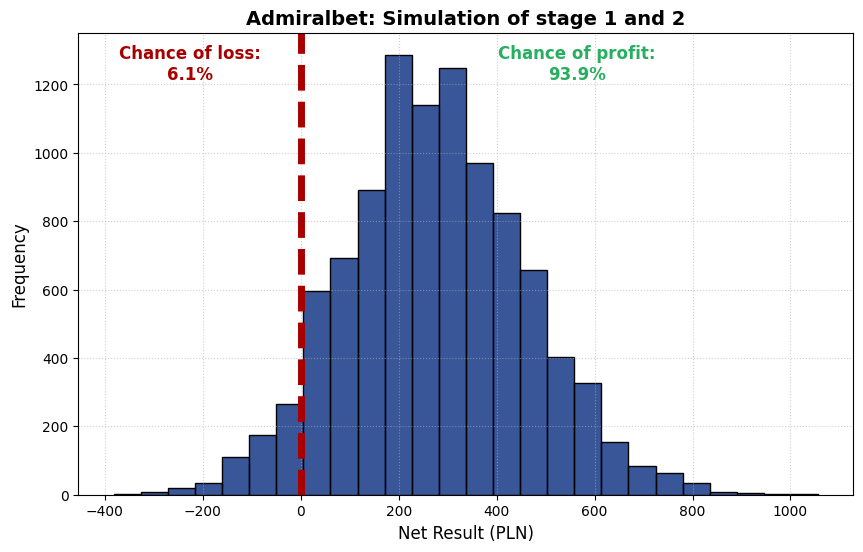

In [4]:
# Simulating stage 1 and stage 2 of the offer
results = []
tries = 10000
offer1 = offers.Admiralbet["Offer_1"]
offer2 = offers.Admiralbet["Offer_2"]
while tries > 0:
    tries -= 1
    offer_1_outcome = engine.many_bets(offer1["min_odds"]+0.15, 10, admiral_overround, offer1["legs"], offer1["tax"], offer1["bonus"] + offer1["deposit"], offer1["turnover"], offer1["free_bet"])
    offer_2_outcome = engine.many_bets(offer2["min_odds"]+0.15, 10, admiral_overround, offer2["legs"], offer2["tax"], offer2["bonus"] + offer2["deposit"], offer2["turnover"], offer2["free_bet"])
    results.append(offer_1_outcome+offer_2_outcome)
results = np.array(results) - offers.Admiralbet["Offer_1"]["deposit"]- offers.Admiralbet["Offer_2"]["deposit"]

engine.visualize_results(results, title="Admiralbet: Simulation of stage 1 and 2")

The algorithmic analysis reveals a stark contrast between the initial and final stages of the promotion.

* **Stages 1 & 2 (Highly Recommended):** These stages demonstrate exceptional mathematical robustness. They remain profitable even under a stress test where the bookmaker's margin is doubled compared to the observed sample (~5.08%).
* **Stage 3 (High Risk):** This stage sits on the razor's edge of profitability. Even with a competitive margin (~5%), the probability of profit hovers near **50%**, effectively rendering it a coin flip. Any slight increase in the margin above the sample parameters turns this stage into a negative EV proposition.

**Projected Performance:**
New customers participating in the offer can expect a **Net Profit (EV) of approximately <span style="color: #1E90FF;">270 PLN</span>**. However, it is crucial to note the **Standard Deviation is ~<span style="color: #1E90FF;">190 PLN</span>**. This indicates that despite the diversification strategy, the variance remains high.

### <span style="color: #009933;">Betfan</span>: Even better ROI

<span style="color: #009933;">Betfan</span> offers a streamlined "3x100%" welcome package. While technically divided into three transactions, effectively it represents a single massive opportunity with identical execution rules.

By maximizing this offer, a player commits a total **Deposit of 600 PLN** to unlock a total **Bonus of 600 PLN** plus an additional **25 PLN Freebet**.

The simulation analyzes this as a cumulative operation with the following aggregate parameters:

* **Total Deposit:** 600 PLN
* **Total Bonus Value:** 625 PLN (600 PLN Cash + 25 PLN Freebet)
* **Total Required Turnover:** <span style="color: #009933;">1200 PLN</span>

The wagering constraints are uniform across the entire volume: every coupon must be an **accumulator (AKO)** consisting of at least **2 legs**, with total minimum odds of **3.00**.

In [5]:
betfan_overround = engine.overround_calculator(odds.betfan_odds)
data = engine.monte_carlo(offers.Betfan, betfan_overround)

data_values = [
    [offers.Betfan["deposit"], offers.Betfan["bonus"], offers.Betfan["free_bet"]["value"], (betfan_overround-1)*100, np.mean(data), np.std(data), engine.chance_of_profit(data)],
]
columns = ["Deposit", "Bonus","Free bet","Overround","EV (PLN)", "Std Dev", "Chance for profit"]
index_names = ["Betfan"]
df = pd.DataFrame(data=data_values, index=index_names, columns=columns)
df

,Deposit,Bonus,Free bet,Overround,EV (PLN),Std Dev,Chance for profit
Betfan,600,600,25,8.81,305.87,137.99,98.98


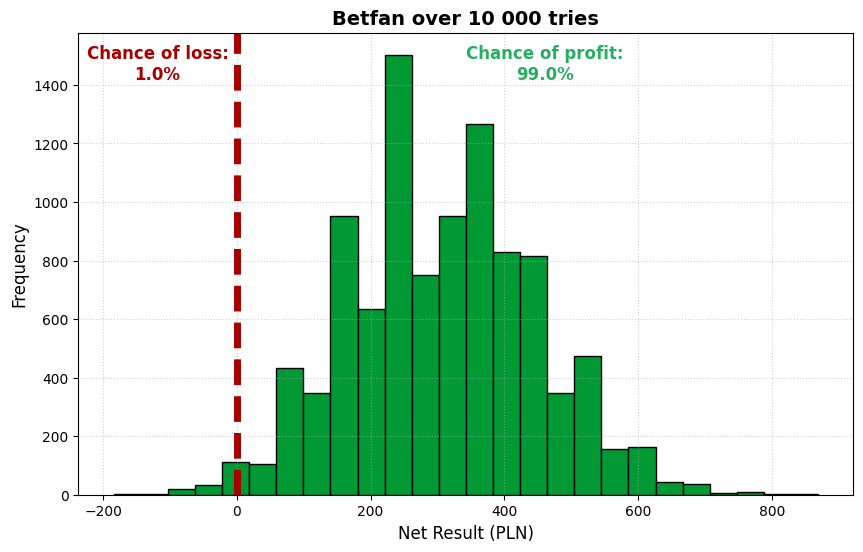

In [6]:
engine.visualize_results(data, "Betfan over 10 000 tries", color = "#009933")

The simulation results for <span style="color: #009933;">Betfan</span> are nothing short of impressive.

* **Exceptional ROI:** Generating an **Expected Value (EV) of ~300 PLN** from a total deposit of only **600 PLN** yields a theoretical return on investment of **50%**. This ratio makes it one of the most lucrative offers currently available on the Polish market.
* **Terms over Odds:** Despite the "expensive" odds, the promotion remains highly profitable due to the lenient wagering requirements (only **1x turnover** of the bonus funds). This proves that favorable bonus terms can mathematically outweigh a higher house edge.

### <span style="color: #e2e2e2a6;">Betters</span>: High turnover kills value

<span style="color: #e2e2e2a6;">Betters</span> presents a streamlined, two-stage welcome package. Unlike many competitors that force accumulators, this offer allows wagering requirements to be met entirely through **Single (SOLO) coupons**.

The simulation is governed by the specific terms and conditions of the promotion outlined below:

1.  **Stage 1:** A **100 PLN** bonus (100% match) combined with a **10 PLN Freebet**. The required turnover is set at <span style="color: #e2e2e2a6;">500 PLN</span>.
2.  **Stage 2:** A **200 PLN** bonus (requiring a 400 PLN deposit). This stage demands a significantly higher turnover of <span style="color: #e2e2e2a6;">1600 PLN</span>.

Across both stages, odds must be at **2.10** minimum.

In [106]:
betters_overround = engine.overround_calculator(odds.betters_odds)
data_stage_1 = engine.monte_carlo(offers.Betters["Offer_1"], betters_overround)
data_stage_2 = engine.monte_carlo(offers.Betters["Offer_2"], betters_overround)

data_values = [
    [offers.Betters["Offer_1"]["deposit"], offers.Betters["Offer_1"]["bonus"], offers.Betters["Offer_1"]["free_bet"]["value"], (betters_overround-1)*100, np.mean(data_stage_1), np.std(data_stage_1), engine.chance_of_profit(data_stage_1)],
    [offers.Betters["Offer_2"]["deposit"], offers.Betters["Offer_2"]["bonus"], offers.Betters["Offer_2"]["free_bet"], (betters_overround-1)*100, np.mean(data_stage_2), np.std(data_stage_2), engine.chance_of_profit(data_stage_2)],
]
columns = ["Deposit", "Bonus","Free bet","Overround","EV (PLN)", "Std Dev", "Chance for profit"]
index_names = ["Betters Stage 1", "Betters Stage 2"]
df = pd.DataFrame(data=data_values, index=index_names, columns=columns)
df

,Deposit,Bonus,Free bet,Overround,EV (PLN),Std Dev,Chance for profit
Betters Stage 1,100,100,10.00,7.99,14.37,67.36,53.61
Betters Stage 2,400,200,NaN,7.99,-96.66,124.07,23.32


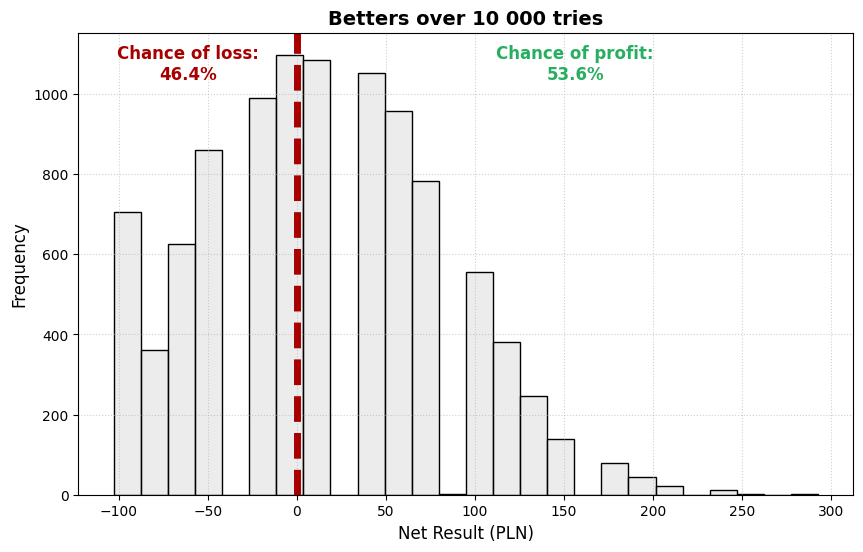

In [110]:
engine.visualize_results(data_stage_1, "Betters over 10 000 tries", color = "#e2e2e2a6")

The viability of the <span style="color: #e2e2e2a6;">Betters</span> promotion is undermined by its high turnover requirement, which significantly increases the risk of loss to nearly 46%. Consequently, the meager projected Expected Value of ~15 PLN fails to justify the exposure, making this offer unattractive.

### <span style="color: #003D99;">Etoto</span>: The Tax-Free <span style="color: #009933;">Betfan</span>

<span style="color: #003D99;">Etoto</span> disrupts the standard Polish betting model with a singular, powerful advantage: **0% Tax**. By removing the standard 12% turnover tax on the promotional play, EV increases greatly.

The offer structure is a classic deposit match with highly favorable constraints:

1.  **The Package:** A **700 PLN** bonus (100% match) triggered by a 700 PLN deposit, supplemented by a **77 PLN Freebet**.
2.  **Volume:** The total turnover required is set at <span style="color: #003D99;">2100 PLN</span> (3x Bonus).

Unlike competitors demanding high-risk odds (2.50+), Etoto requires an **accumulator (AKO) with 3 legs**, but with a remarkably low total minimum odds of just **2.00**.

In [35]:
etoto_overround = engine.overround_calculator(odds.etoto_odds)
data = engine.monte_carlo(offers.Etoto, etoto_overround)

data_values = [
    [offers.Etoto["deposit"], offers.Etoto["bonus"], offers.Etoto["free_bet"]["value"], (etoto_overround-1)*100, np.mean(data), np.std(data), engine.chance_of_profit(data)],
]
columns = ["Deposit", "Bonus","Free bet","Overround","EV (PLN)", "Std Dev", "Chance for profit"]
index_names = ["Etoto"]
df = pd.DataFrame(data=data_values, index=index_names, columns=columns)
df

,Deposit,Bonus,Free bet,Overround,EV (PLN),Std Dev,Chance for profit
Etoto,700,700,77,6.76,380.22,174.65,98.78


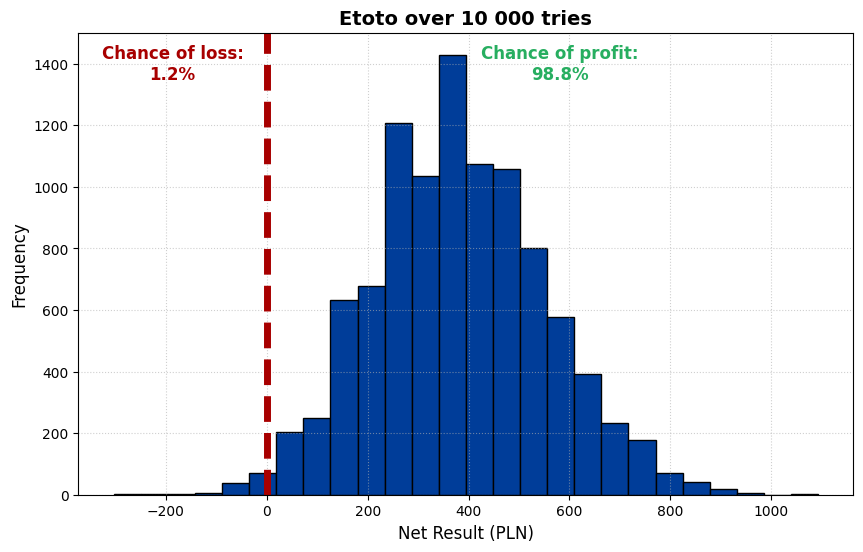

In [8]:
engine.visualize_results(data, "Etoto over 10 000 tries", color = "#003D99")

The **0% tax** on Etoto's bonus play is its biggest advantage, making this offer unique in the Polish market. Because the standard 12% tax is removed, the player's statistical edge is much higher. Even with a moderate bookmaker margin, our simulations confirm high profitability, showing an Expected Value (EV) of about **~370 PLN**.

### <span style="color: #d0e1fa4f;">Lebull</span>: Turnover calculated from deposit

<span style="color: #d0e1fa4f;">Lebull</span> is unique because it allows you to clear the wagering requirements using **Single (SOLO) coupons**.

The welcome package consists of three stages:

1.  **Stage 1:** A **200 PLN** bonus (100% match) plus a **20 PLN Freebet**. You must wager **600 PLN** with minimum odds of **1.95**.
2.  **Stage 2:** A **300 PLN** bonus (requires a 600 PLN deposit) and **20 PLN Freebet**. The wagering requirement is **1800 PLN**.
3.  **Stage 3:** A **400 PLN** bonus (requires a 800 PLN deposit) and **10 PLN Freebet**. The wagering requirement is **2400 PLN**.

A key difference exists between <span style="color: #d0e1fa4f;">Lebull</span> and <span style="color: #1E90FF;">Admiralbet</span>. Admiralbet calculates turnover based on the *Bonus* amount, but Lebull does so using **Deposit**. In Stage 2 and 3, tying the requirement to the deposit results in a proportionally higher wagering volume relative to the granted bonus funds.

In [22]:
lebull_overround = engine.overround_calculator(odds.lebull_odds)
data_stage_1 = engine.monte_carlo(offers.Lebull["Offer_1"], lebull_overround)
data_stage_2 = engine.monte_carlo(offers.Lebull["Offer_2"], lebull_overround)
data_stage_3 = engine.monte_carlo(offers.Lebull["Offer_3"], lebull_overround)

data_values = [
    [offers.Lebull["Offer_1"]["deposit"], offers.Lebull["Offer_1"]["bonus"], offers.Lebull["Offer_1"]["free_bet"]["value"], (lebull_overround-1)*100, np.mean(data_stage_1), np.std(data_stage_1), engine.chance_of_profit(data_stage_1)],
    [offers.Lebull["Offer_2"]["deposit"], offers.Lebull["Offer_2"]["bonus"], offers.Lebull["Offer_2"]["free_bet"]["value"], (lebull_overround-1)*100, np.mean(data_stage_2), np.std(data_stage_2), engine.chance_of_profit(data_stage_2)],
    [offers.Lebull["Offer_3"]["deposit"], offers.Lebull["Offer_3"]["bonus"], offers.Lebull["Offer_3"]["free_bet"]["value"], (lebull_overround-1)*100, np.mean(data_stage_3), np.std(data_stage_3), engine.chance_of_profit(data_stage_3)]
]
columns = ["Deposit", "Bonus","Free bet","Overround","EV (PLN)", "Std Dev", "Chance for profit"]
index_names = ["Lebull Stage 1", "Lebull Stage 2", "Lebull Stage 3"]
df = pd.DataFrame(data=data_values, index=index_names, columns=columns)
df

,Deposit,Bonus,Free bet,Overround,EV (PLN),Std Dev,Chance for profit
Lebull Stage 1,200,200,20,8.89,96.59,73.77,91.13
Lebull Stage 2,600,300,20,8.89,-34.19,124.50,39.10
Lebull Stage 3,800,400,10,8.89,-55.36,142.04,33.34


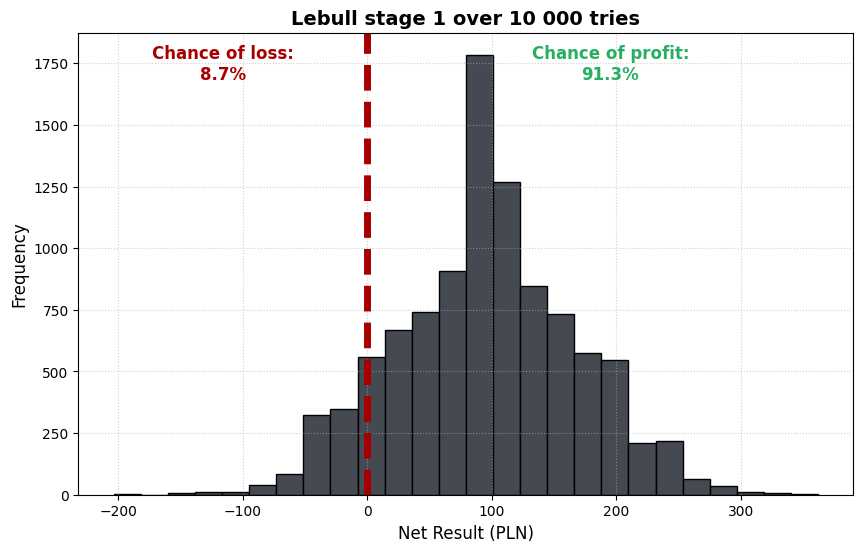

In [17]:
engine.visualize_results(data_stage_1, "Lebull stage 1 over 10 000 tries", color = "#454952ff")

The performance of <span style="color: #d0e1fa4f;">Lebull's</span> offer in Stages 2 and 3 is significantly compromised by the turnover requirement being calculated on the **Deposit** amount. Consequently, the most rational strategy is to participate exclusively in **Stage 1**, which maintains a favorable risk profile with a projected **Expected Value (EV) of approximately 90 PLN**.

### <span style="color: #FFD700;">LV BET</span>: The worst offer

<span style="color: #FFD700;">LV BET</span> provides a multi-option welcome package that requires careful scrutiny. While the operator markets "Tax-Free" betting, this benefit is effectively realized only **after** the wagering requirements are met, rather than during the turnover process itself. Crucially, LV BET stands alone in this analysis by calculating turnover based on the sum of both Deposit and Bonus, a structural condition that is mathematically highly unfavorable for the player.

**Offer Variants:**
* **Offer 1 (Standard):** 500 PLN Bonus (100% Match) + 30 PLN Free bet. Turnover: **4030 PLN** (min odds 1.75).
* **Offer 1 (Alternative):** 600 PLN Bonus (100% Match) + 30 PLN Free bet. Requires a massive **7230 PLN** turnover, but at lower odds (1.50).
* **Offer 2:** 600 PLN Bonus (50% Match). Turnover: **5400 PLN**.
* **Offer 3:** 900 PLN Bonus (Requires 3000 PLN Deposit). Turnover: **7800 PLN**.
* **Offer 4:** 500 PLN Bonus (50% Match). Turnover: **4500 PLN**.

In [25]:
lvbet_overround = engine.overround_calculator(odds.lvbet_odds)
data_stage_1 = engine.monte_carlo(offers.LV_BET["Offer_1"], lvbet_overround)
data_stage_1_alt = engine.monte_carlo(offers.LV_BET["Offer_1_alt"], lvbet_overround)
data_stage_2 = engine.monte_carlo(offers.LV_BET["Offer_2"], lvbet_overround)
data_stage_3 = engine.monte_carlo(offers.LV_BET["Offer_3"], lvbet_overround)
data_stage_4 = engine.monte_carlo(offers.LV_BET["Offer_4"], lvbet_overround)

data_values = [
    [offers.LV_BET["Offer_1"]["deposit"], offers.LV_BET["Offer_1"]["bonus"], offers.LV_BET["Offer_1"]["free_bet"]["value"], (lvbet_overround-1)*100, np.mean(data_stage_1), np.std(data_stage_1), engine.chance_of_profit(data_stage_1)],
    [offers.LV_BET["Offer_1_alt"]["deposit"], offers.LV_BET["Offer_1_alt"]["bonus"], offers.LV_BET["Offer_1_alt"]["free_bet"]["value"], (lvbet_overround-1)*100, np.mean(data_stage_1_alt), np.std(data_stage_1_alt), engine.chance_of_profit(data_stage_1_alt)],    
    [offers.LV_BET["Offer_2"]["deposit"], offers.LV_BET["Offer_2"]["bonus"], offers.LV_BET["Offer_2"]["free_bet"], (lvbet_overround-1)*100, np.mean(data_stage_2), np.std(data_stage_2), engine.chance_of_profit(data_stage_2)],
    [offers.LV_BET["Offer_3"]["deposit"], offers.LV_BET["Offer_3"]["bonus"], offers.LV_BET["Offer_3"]["free_bet"], (lvbet_overround-1)*100, np.mean(data_stage_3), np.std(data_stage_3), engine.chance_of_profit(data_stage_3)],
    [offers.LV_BET["Offer_4"]["deposit"], offers.LV_BET["Offer_4"]["bonus"], offers.LV_BET["Offer_4"]["free_bet"], (lvbet_overround-1)*100, np.mean(data_stage_4), np.std(data_stage_4), engine.chance_of_profit(data_stage_4)]
]
columns = ["Deposit", "Bonus","Free bet","Overround","EV (PLN)", "Std Dev", "Chance for profit"]
index_names = ["LV BET Stage 1", "LV BET Stage 1 alt", "LV BET Stage 2", "LV BET Stage 3", "LV BET Stage 4"]
df = pd.DataFrame(data=data_values, index=index_names, columns=columns)
df

,Deposit,Bonus,Free bet,Overround,EV (PLN),Std Dev,Chance for profit
LV BET Stage 1,500,500,30.00,4.56,-120.95,166.20,22.41
LV BET Stage 1 alt,600,600,30.00,4.56,-480.40,139.28,0.24
LV BET Stage 2,1200,600,NaN,4.56,-256.49,190.51,8.36
LV BET Stage 3,3000,900,NaN,4.56,-334.36,235.00,7.81
LV BET Stage 4,1000,500,NaN,4.56,-213.46,175.54,11.02


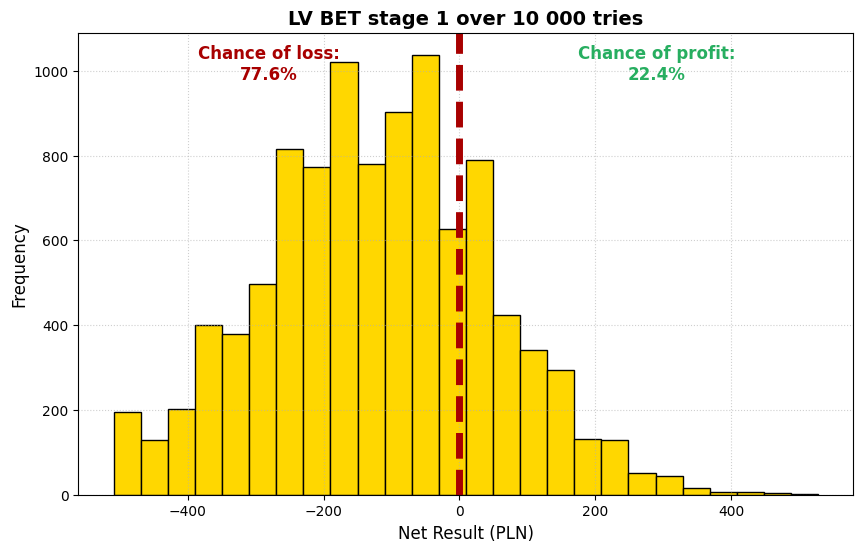

In [29]:
engine.visualize_results(data_stage_1, "LV BET stage 1 over 10 000 tries", color = "#FFD700")

None of the <span style="color: #FFD700;">LV BET</span> promotional stages provide a positive Expected Value, primarily due to the misleading "Tax-Free" claim and the market's highest turnover requirements calculated on the sum of deposit and bonus. Consequently, the house edge and the tax erodes the funds before wagering is complete, leading to a projected **total statistical loss of approximately 1400 PLN**.

### <span style="color: #F58025;">STS</span>: Power of overround
<span style="color: #F58025;">STS</span> shares structural similarities with <span style="color: #1E90FF;">Admiralbet</span> and <span style="color: #d0e1fa4f;">Lebull</span>, offering a multi-stage bonus. Its unique mechanic is the **hybrid wagering requirement**, calculated as **1x Deposit + 2x Bonus**.

The campaign is divided into specific stages:

1.  **Stage 1:** A **100 PLN** bonus (100% match). To unlock funds, you must wager **300 PLN** on coupons with at least **2 legs** and min. odds of **1.91**.
2.  **Stages 2 & 3:** A **300 PLN** bonus (50% match, requires 600 PLN deposit). The turnover requirement increases to **1200 PLN**.

In [105]:
sts_overround = engine.overround_calculator(odds.sts_odds)
data_stage_1 = engine.monte_carlo(offers.STS["Offer_1"], sts_overround)
data_stage_2_3 = engine.monte_carlo(offers.STS["Offer_2_and_3"], sts_overround)

data_values = [
    [offers.STS["Offer_1"]["deposit"], offers.STS["Offer_1"]["bonus"], offers.STS["Offer_1"]["free_bet"], (sts_overround-1)*100, np.mean(data_stage_1), np.std(data_stage_1), engine.chance_of_profit(data_stage_1)],
    [offers.STS["Offer_2_and_3"]["deposit"], offers.STS["Offer_2_and_3"]["bonus"], offers.STS["Offer_2_and_3"]["free_bet"], (sts_overround-1)*100, np.mean(data_stage_2_3), np.std(data_stage_2_3), engine.chance_of_profit(data_stage_2_3)],
]
columns = ["Deposit", "Bonus","Free bet","Overround","EV (PLN)", "Std Dev", "Chance for profit"]
index_names = ["STS Stage 1", "STS Stage 2 and 3"]
df = pd.DataFrame(data=data_values, index=index_names, columns=columns)
df

,Deposit,Bonus,Free bet,Overround,EV (PLN),Std Dev,Chance for profit
STS Stage 1,100,100,None,9.62,20.16,48.39,59.05
STS Stage 2 and 3,600,300,None,9.62,-21.56,97.41,42.72


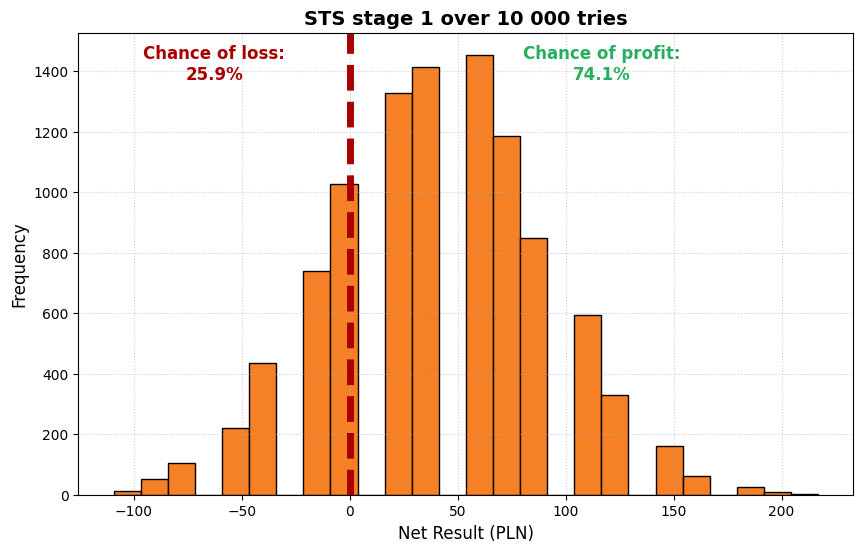

In [41]:
engine.visualize_results(data_stage_1, "STS stage 1 over 10 000 tries", color = "#F58025")

<span style="color: #F58025;">STS</span> is handicapped by the highest base margin, which the **AKO 2** requirement effectively compounds to ~18%. Consequently, even the first stage yields a negligible **EV of ~20 PLN**, making the offer mathematically unattractive relative to the risk.

---
## Bet-Based Promotions (Freebet, Cashback, Boost)

Bet-based promotions differ from turnover offers by focusing on the outcome of specific, individual wagers rather than cumulative volume. This category includes Freebets (stakes paid by the operator), Cashbacks (refunds on losses), and Profit Boosts. The mechanism typically ties the reward to a single, "one-shot" event or coupon resolution.

From a mathematical perspective, this format implies **higher variance**. Since value is often concentrated in a single wager, the risk of zero return is significant ("hit or miss"). To maximize Expected Value (EV), the optimal strategy shifts from variance minimization to **upside maximization**—specifically, targeting higher odds to offset "Stake Not Returned" mechanics or leveraging insurance for aggressive plays. Unlike turnover bonuses, these promotions rely on short-term volatility to realize profit.

### <span style="color:red">Betclic</span>: Freebet as a Cashback
Betclic offers a classic Bet-Based promotion where your first 50 PLN wager is insured, granting a refund as an SNR Freebet in the event of a loss. Uniquely, this operator provides tax-free betting, meaning the standard 12% deduction is waived on all stakes.

In [81]:
betclic_overround = engine.overround_calculator(odds.betclic_odds)
p_win = 1/2/betclic_overround
p_loss = 1 - p_win
p_win_free_bet = 1/3/betclic_overround

EV = (p_win*50*2 + p_loss*p_win_free_bet*50*2) - 50

column_names = ["Win Deposit", "Win Freebet", "Lose Both", "Betclic overround", "EV"]
values = [
    [p_win, p_loss*p_win_free_bet, p_loss*(1-p_win_free_bet), (betclic_overround-1)*100, EV],
    [50*2, 50*2, 0, (betclic_overround-1)*100, EV]
]
index_names = ["Probability of outcome", "Winnings"]

df = pd.DataFrame(values, index_names, column_names)
df

,Win Deposit,Win Freebet,Lose Both,Betclic overround,EV
Probability of outcome,0.46,0.17,0.38,9.82,12.06
Winnings,100.00,100.00,0.00,9.82,12.06


Ultimately, this promotion functions as a coin toss with a favorable 63% win probability, which can be marginally optimized by splitting the resulting Freebet and targeting higher odds. It represents a fair proposition for any player willing to risk the initial 50 PLN to secure this statistical advantage.

### <span style="color: #0073CF;">Betcris</span>: The Triple Cashback

<span style="color: #0073CF;">Betcris</span> mirrors the risk-free mechanics popularized by <span style="color: #D10A28;">Betclic</span>, but scales the value proposition with significantly higher limits. Instead of a single shot, the promotion covers the first three separate bets **100 PLN** each, awarding a **110 PLN Freebet** for any coupon settled as a loss. To qualify for this refund, each wager must be an **accumulator (AKO) with at least 3 legs**, where every single selection meets a **minimum odds requirement of 1.30**.

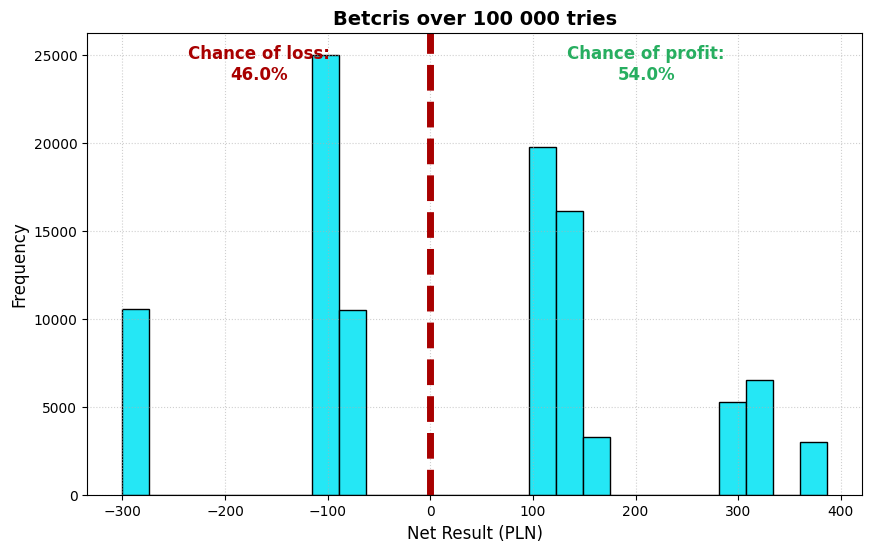

EV: 32.48 PLN


In [104]:
betcris_overround = engine.overround_calculator(odds.betcris_odds)
p_win = 1/2.3/betcris_overround**3
p_win_freebet = 1/3.5/betcris_overround**3

data = []
for i in range(100000):
    money = 0
    for _ in range(3):
        if random.random() < p_win:
            money += 100*2.3*0.88
        else:
            if random.random() < p_win_freebet:
                money += (110*3.5*0.88)-110
    data.append(money)

data = np.array(data) - 300
engine.visualize_results(data, "Betcris over 100 000 tries", color = "#25E7F5")
print(f"EV: {round(np.mean(data), 2)} PLN")

The simulation of the <span style="color: #0073CF;">Betcris</span> offer yields a positive **Expected Value (EV) of approximately 30 PLN**. However, this marginal profitability is overshadowed by a critical risk factor: the **probability of ending with a financial loss stands at ~46%**.

This near-coin-flip scenario creates a disproportionate risk-to-reward ratio. While mathematically profitable, for a single user, this promotion is difficult to recommend as a reliable investment.

### <span style="color: #097E2CFF;">ComeOn</span>: Doubling the win

<span style="color: #097E2CFF;">ComeOn</span> introduces a hybrid package with a **Risk-Free Bet**: loss on the first bet (stake 113.64 PLN) triggers a **100 PLN refund**. This is followed by a **Profit Boost** on the next three winning coupons, where winning's are doubled and then stake is substracted from them. To qualify for both stages, players must place **3-leg accumulators (AKO 3)** with minimum total odds of **3.00**.

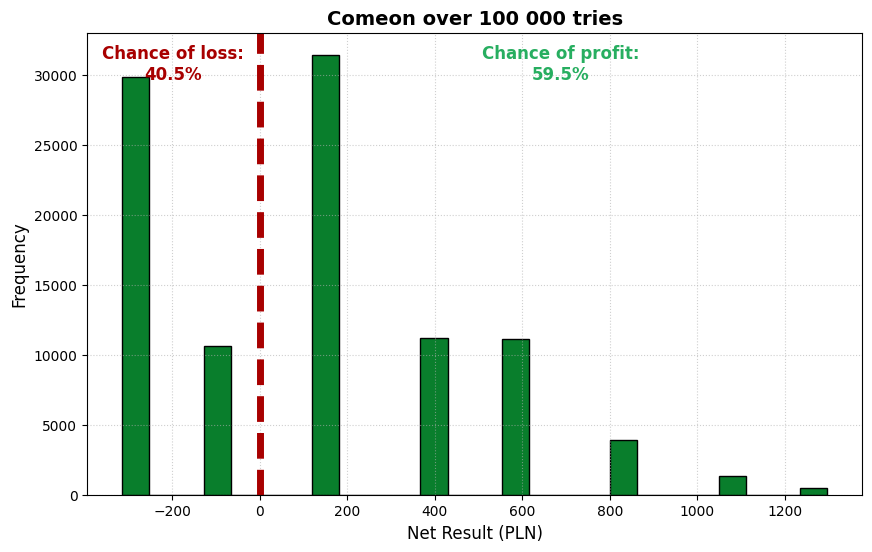

EV: 106.09 PLN


In [126]:
comeon_overround = engine.overround_calculator(odds.comeon_odds)
p_win = 1/3.2/comeon_overround**3

data = []
for i in range(100000):
    money = 0
    for j in range(4):
        if random.random() < p_win:
            if j == 0:
                money += 113.64*3.2*0.88
            else:
                money += 100*3.2*0.88*2-100
        elif j == 0:
            money += 100
    data.append(money)

data = np.array(data) - 300 - 113.64
engine.visualize_results(data, "Comeon over 100 000 tries", color = "#097E2CFF")
print(f"EV: {round(np.mean(data), 2)} PLN")

The algorithmic analysis characterizes this offer as a high-variance proposition, with simulations indicating a negative outcome in **40% of cases**. Despite the elevated risk profile, the promotion maintains a substantial **Expected Value (EV) of approximately <span style="color: #097E2CFF;">100 PLN</span>**. From a risk-management perspective, restricting participation exclusively to the first part of the promotion significantly optimizes the risk-reward ratio. This conservative strategy caps the maximum financial exposure at **14 PLN**, while preserving a profit potential of **300 PLN**.